# Economic Freedom Ranking 2019, fundamental analysis

### Importing libraries required to read file, manage data and plot graphs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Creating different Dataframes based on the requirements

In [2]:
# To plot the time series line plot of the results from function mov_median
efw_panel = pd.read_excel('efw-2019-master-index-data-for-researchers.xlsx',sheet_name = 'EFW Panel Data 2019 Report', usecols = 'B,D:E', header = 2)

# To Plot bar chart that displays the Top Marginal Income Tax Rate for the top 20 countries that ranked highest in the Economic Freedom Index
top_mar = pd.read_excel('efw-2019-master-index-data-for-researchers.xlsx', sheet_name = 'EFW Index 2019 Report', usecols = 'D:E,N', header = 4)

#To scatter plot the relationship between "Reliability of Police" and "Business Cost of Crime" variables for all countries in the 2019 report
police_bus = pd.read_excel('efw-2019-master-index-data-for-researchers.xlsx', sheet_name = 'EFW Index 2019 Report', usecols = 'D,AB:AC', header = 4)


### Function mov_median to subset the observations for the specified country

In [3]:
def mov_median(dataframe, country, column, periods):
    pd.set_option('mode.chained_assignment', None)
    efw = dataframe[dataframe[column] == country]
    efw['EFW_MA'] = efw.iloc[:,2].rolling(window = periods).mean()
    efw.plot(x = 'Year', y = 'EFW_MA')
    return(efw)

### Bar chart that displays the Top Marginal Income Tax Rate for the top 20 countries that ranked highest in the Economic Freedom Index

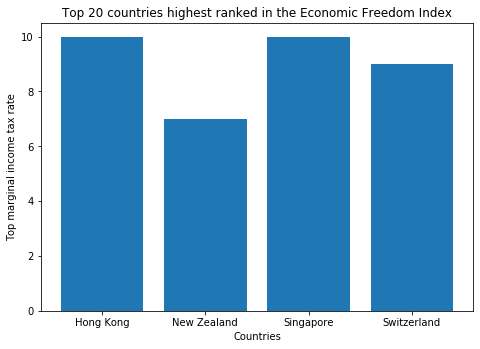

In [4]:
top_20 = top_mar.sort_values(by=['Economic Freedom Summary Index'], ascending = False)
top_20 = top_20.iloc[:20]
bar_top = plt.figure()
top_ax = bar_top.add_axes([0,0,1,1])
top_ax.bar(top_20['Countries'],top_20['Top marginal income tax rate'])
top_ax.set_xlabel('Countries')
top_ax.set_ylabel('Top marginal income tax rate')
top_ax.set_title('Top 20 countries highest ranked in the Economic Freedom Index')
plt.show()

### Scatter plot to display the relationship between "Reliability of Police" and "Business Cost of Crime" variables for all countries in reference to Economic Freedom Index, 2019 report

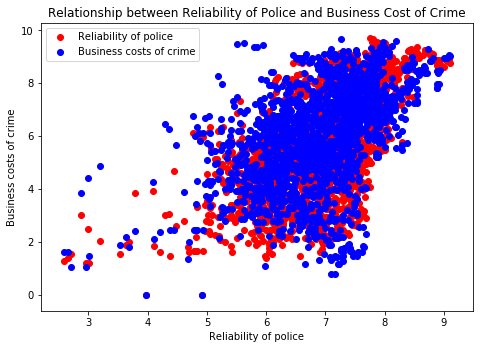

In [5]:
relate = plt.figure()
rel_ax = relate.add_axes([0,0,1,1])
rel_ax.scatter(top_mar['Economic Freedom Summary Index'], police_bus['Reliability of police'], color = 'r')
rel_ax.scatter(top_mar['Economic Freedom Summary Index'], police_bus['Business costs of crime'], color = 'b')
rel_ax.set_xlabel('Reliability of police')
rel_ax.set_ylabel('Business costs of crime')
rel_ax.legend(labels=['Reliability of police','Business costs of crime'])
rel_ax.set_title('Relationship between Reliability of Police and Business Cost of Crime')
plt.show()

### Driving function call to see the subset and Time series for the specified country

,Year,Countries,EFW,EFW_MA
3696,2017,United Kingdom,8.092294,NaN
3697,2016,United Kingdom,8.062981,NaN
3698,2015,United Kingdom,8.075913,8.077063
3699,2014,United Kingdom,7.973524,8.037473
3700,2013,United Kingdom,8.003675,8.017704
3701,2012,United Kingdom,8.023953,8.000384
3702,2011,United Kingdom,7.991630,8.006419
3703,2010,United Kingdom,8.028130,8.014571
3704,2009,United Kingdom,8.010150,8.009970
3705,2008,United Kingdom,8.025975,8.021418


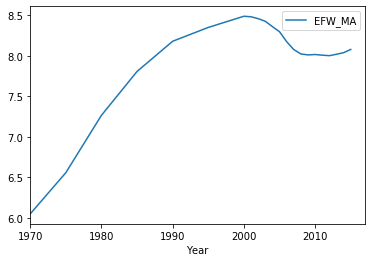

In [6]:
result = mov_median(efw_panel, 'United Kingdom', 'Countries', 3)
result

## Insights derived from this visual analysis

* The trailing moving median reduces as number of periods increases
* There is a close relationship between Business costs of crime and Police reliability
* Hong Kong has the highest Marginal Income Tax rate